<h1 style="display: inline-block;"> O que fazer com <br> extensões? </h1> <h4 style="display: inline-block; float: right;"> 8- FuncionalidadesIPython.ipynb </h4>


```python
def load_ipython_extension(ipython: "InteractiveShell"):
```

* Registrar Magics
* Registrar Callbacks

In [1]:
ipython = get_ipython()

### Registrando Magics

In [2]:
def ospath(line):
    from os import path
    return getattr(path, line) if line else path

ipython.register_magic_function(ospath, magic_kind='line')

In [4]:
# from os.path import join
funcao = "join"
join = %ospath {funcao}
join("a", "b")

'a/b'

In [5]:
join = %ospath join
join("a", "b")

'a/b'

In [6]:
from IPython.core.magic import Magics, magics_class, line_magic, cell_magic, line_cell_magic
from IPython.core.magic_arguments import argument, magic_arguments, parse_argstring
from IPython.display import Javascript, display

@magics_class
class Magicas(Magics):
    @magic_arguments()
    @argument('-b', '--backward', default=-1, type=int, help="set cursor to P cells before")
    @argument('-f', '--forward', default=-1, type=int, help="set cursor to P cells after")
    @line_magic
    def move(self, line):
        args = parse_argstring(self.move, line)
        if args.forward != -1:
            args.backward = -args.forward
        if args.backward != -1:
            display(Javascript(
                "Jupyter.notebook.select("
                "Jupyter.notebook.get_selected_index() - {})"
                .format(args.backward + 1)
            ))
    
    @line_cell_magic
    def decorar(self, line, cell=None):
        decorador = line.split(" ")[0]
        if cell is None:
            funcao = line.split(" ")[-1]
            self.shell.user_ns[funcao] = self.shell.user_ns[decorador](self.shell.user_ns[funcao])
        else:
            tree = ast.parse(cell)
            tree = TransformarDefinicoes(decorador).visit(tree)
            compiled = compile(tree, 'Cell Tests', 'exec')
            exec(compiled, self.shell.user_global_ns, self.shell.user_ns)

In [7]:
import ast
class TransformarDefinicoes(ast.NodeTransformer):
    def __init__(self, decorador):
        self.decorador = decorador
    def visit_FunctionDef(self, node):
        node.decorator_list.append(ast.copy_location(ast.Name(self.decorador, ast.Load()), node))
        return node
    

ipython.register_magics(Magicas)

In [8]:
from functools import wraps
def imprimir_chamadas(f):
    @wraps(f)
    def dec(*args, **kwargs):
        result = f(*args, **kwargs) 
        print("{}(*{}, **{}) = {}".format(f.__name__, args, kwargs, result))
        return result
    return dec

In [9]:
%%decorar imprimir_chamadas
def soma(x, y):
    return x + y

def subtracao(x, y):
    return x - y

def multiplicacao(x, y):
    return x * y

In [10]:
soma(1, 2)

soma(*(1, 2), **{}) = 3


3

In [11]:
subtracao(1, 2)

subtracao(*(1, 2), **{}) = -1


-1

In [24]:
def divisao(x, y):
    return x / y
%decorar imprimir_chamadas divisao
divisao(10, 5)

divisao(*(10, 5), **{}) = 2.0


2.0

In [23]:
%move -b 1

<IPython.core.display.Javascript object>

#### Bonus 2- imprimindo AST

In [25]:
from grafo import Grafo

In [26]:
from collections import defaultdict

class ASTDict(ast.NodeVisitor):
    def __init__(self):
        self.pai = "root"
        self.arvore = defaultdict(list)
        
    def generic_visit(self, node):
        pai_velho = self.pai
        self.pai = "{}_{}".format(type(node).__name__, id(node))
        self.arvore[pai_velho].append(self.pai)
        ast.NodeVisitor.generic_visit(self, node)
        self.pai = pai_velho
        
def ver_ast(line, cell):
    tree = ast.parse(cell)
    ast_dict = ASTDict()
    ast_dict.visit(tree)
    return Grafo(ast_dict.arvore)
    
ipython.register_magic_function(ver_ast, magic_kind="cell")

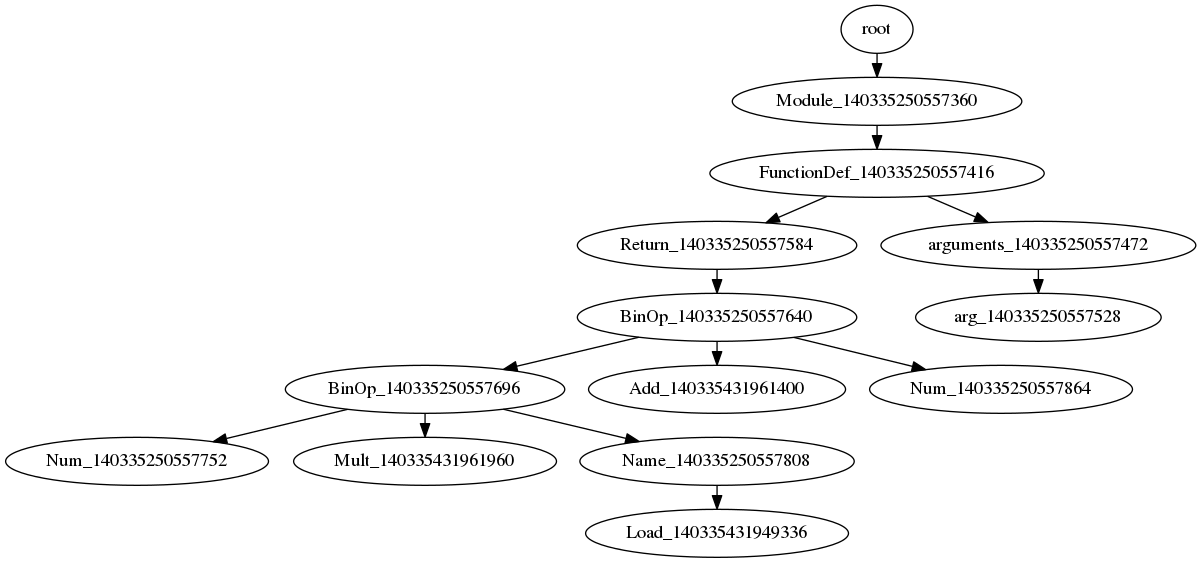

In [28]:
%%ver_ast
def f(x):
    return 2 * x + 5

In [29]:
f

NameError: name 'f' is not defined

### Registrando callbacks

In [30]:
ipython = get_ipython()
from datetime import datetime
class Timer:
    def __init__(self):
        self.initial = datetime.now()
    def pre_execute(self):
        self.initial = datetime.now()
    def post_execute(self):
        print(datetime.now() - self.initial)
timer = Timer()
timer.pre_execute()
ipython.events.register("pre_run_cell", timer.pre_execute)
ipython.events.register("post_run_cell", timer.post_execute)

0:00:00.000152


In [32]:
from time import sleep
sleep(0.5)

0:00:00.501637


In [34]:
a = 2

0:00:00.000788


In [36]:
2**50

1125899906842624

0:00:00.005571



https://github.com/JoaoFelipe/presentations/20161210_PythonRio  

<span style="font-size:1.5em;" id="slidepagination"> [<(7) Extensão IPython](ExtensaoIPython.ipynb) (8) [Extensão Front-end (9)>](nbextension.ipynb) </span>
&nbsp;


In [1]:
import pagination

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>